__Feature descriptions:__

- __PassengerId__ - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- __HomePlanet__ - The planet the passenger departed from, typically their planet of permanent residence.

- __CryoSleep__ - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- __Cabin__ - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- __Destination__ - The planet the passenger will be debarking to.

- __Age__ - The age of the passenger.

- __VIP__ - Whether the passenger has paid for special VIP service during the voyage.

- __RoomService__, __FoodCourt__, __ShoppingMall__, __Spa__, __VRDeck__ - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- __Name__ - The first and last names of the passenger.

- __Transported__ - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Loading Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

# Data Loading 

## Loading Train and Test set

In [2]:
# Save to df
train = pd.read_csv('spaceship-titanic/train.csv')
test = pd.read_csv('spaceship-titanic/test.csv')

# Shape and preview
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)

Train set shape: (8693, 14)
Test set shape: (4277, 13)


# First look at data 

In [3]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
# features with float64 type
train.describe(include=["float64"]).T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [6]:
#features with object and bool types
train.describe(include=[object,bool]).T

,count,unique,top,freq
PassengerId,8693,8693,6171_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Cuses Pread,2
Transported,8693,2,True,4378


# Checking for duplicates

In [7]:
def check_duplicates(df):
    duplicate = df[df.duplicated()]
    
    if duplicate.empty:
        print('No duplicate rows!')
    else:
        print("Duplicate Rows :")
        duplicate    

In [8]:
# on train set
check_duplicates(train)

# on test set
check_duplicates(test)

No duplicate rows!
No duplicate rows!


# Missing Values 

In [9]:
# Checking the total amount of empty values in the dataset
print(f' Missing Data on train set: {train.isnull().sum().sum(): 5,.0f} Values')
print('')

print(f' Missing Data on test set: {test.isnull().sum().sum(): 5,.0f} Values')
print('')

 Missing Data on train set:  2,324 Values

 Missing Data on test set:  1,117 Values



In [10]:
# Looking at NaN % within the train data
nan = pd.DataFrame(train.isna().sum(), columns = ['NaN_sum'])
nan['Percentage(%)'] = (nan['NaN_sum']/len(train))*100
# nan['Type'] = nan.index.dtype()
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])

types = []
for i in nan.index: 
    types.append(train[i].dtype)

nan['Type'] = types

nan

,NaN_sum,Percentage(%),Type
Age,179,2.059128,float64
RoomService,181,2.082135,float64
Destination,182,2.093639,object
FoodCourt,183,2.105142,float64
Spa,183,2.105142,float64
VRDeck,188,2.162660,float64
Cabin,199,2.289198,object
Name,200,2.300702,object
HomePlanet,201,2.312205,object
VIP,203,2.335212,object


In [11]:
# Looking at NaN % within the test data
nan = pd.DataFrame(test.isna().sum(), columns = ['NaN_sum'])
nan['Percentage(%)'] = (nan['NaN_sum']/len(test))*100
# nan['Type'] = nan.index.dtype()
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])

types = []
for i in nan.index: 
    types.append(test[i].dtype)

nan['Type'] = types

nan

,NaN_sum,Percentage(%),Type
VRDeck,80,1.870470,float64
RoomService,82,1.917232,float64
HomePlanet,87,2.034136,object
Age,91,2.127660,float64
Destination,92,2.151040,object
CryoSleep,93,2.174421,object
VIP,93,2.174421,object
Name,94,2.197802,object
ShoppingMall,98,2.291326,float64
Cabin,100,2.338087,object


# Studying numerical features 

The numerical features are:

In [12]:
train.describe(include=["float64"]).T.index.values

array(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype=object)

# `Age`

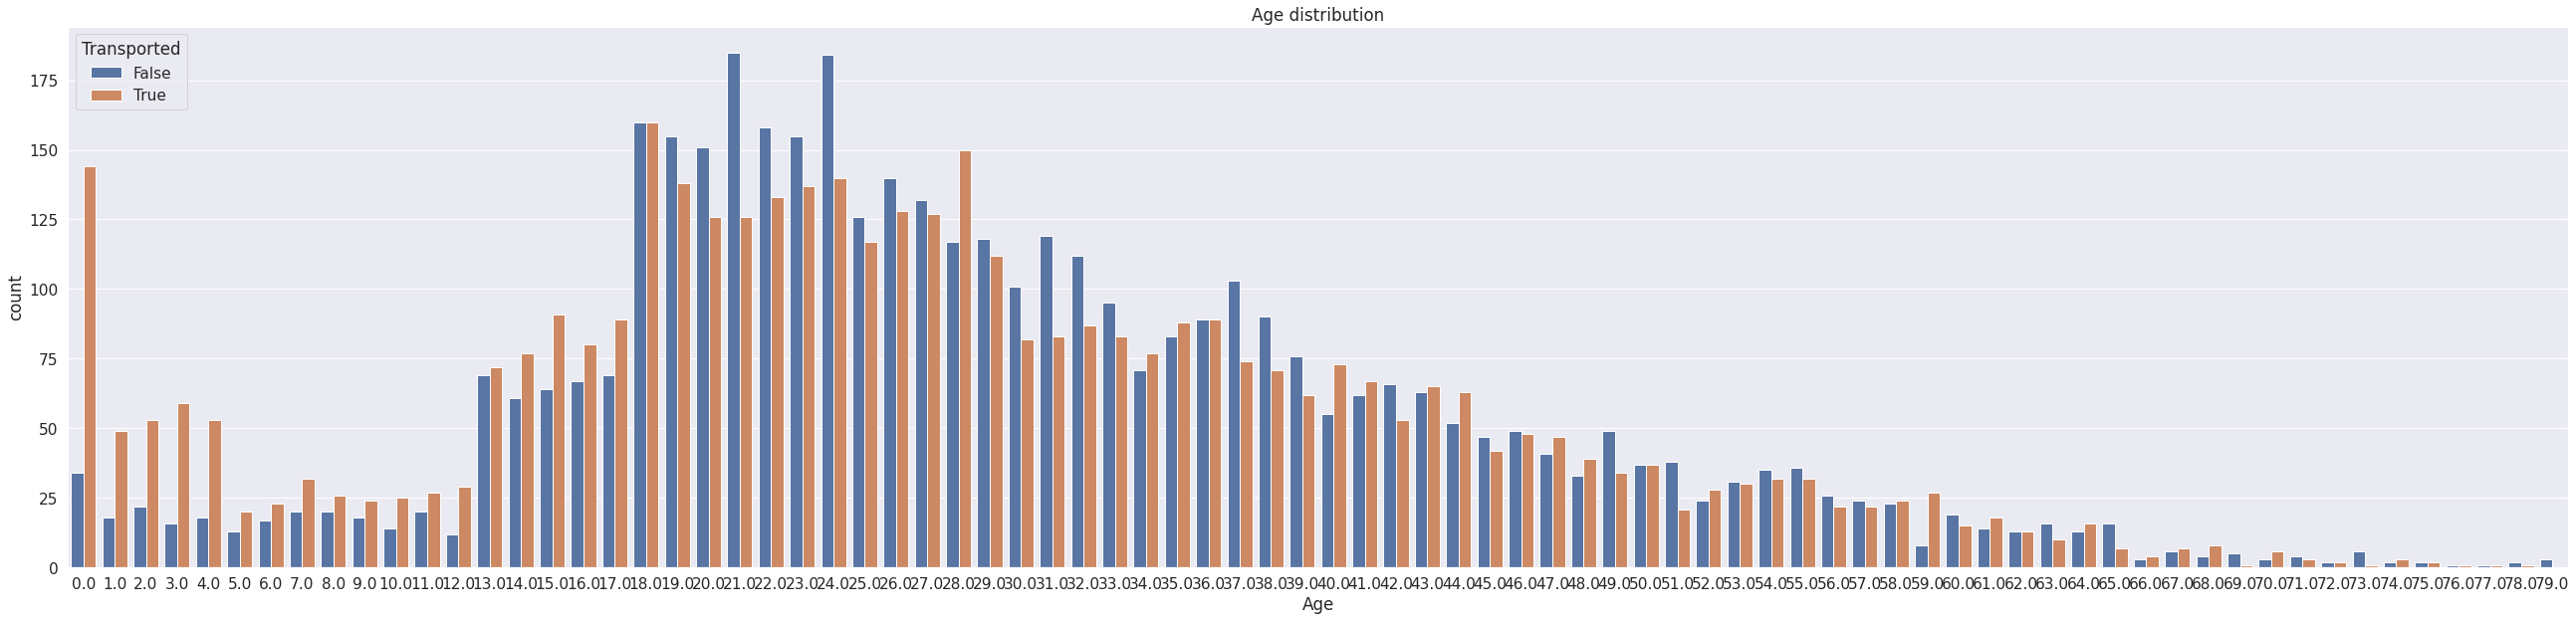

In [13]:
# Plot distribution of new features
plt.figure(figsize=(45, 10))

g=sns.countplot(data=train, x='Age', hue='Transported')
plt.title('Age distribution')
plt.show()

## Create `Age_group` feature

In [14]:
train['Age_group'] = np.nan

train.loc[train['Age']<= 18, 'Age_group'] = 'Age_0-18'
train.loc[(train['Age'] > 18) & (train['Age'] <= 36), 'Age_group'] = 'Age_19-36'
train.loc[(train['Age'] > 36) & (train['Age'] <= 50), 'Age_group'] = 'Age_37-50'
train.loc[train['Age'] > 50, 'Age_group'] = 'Age_50+'

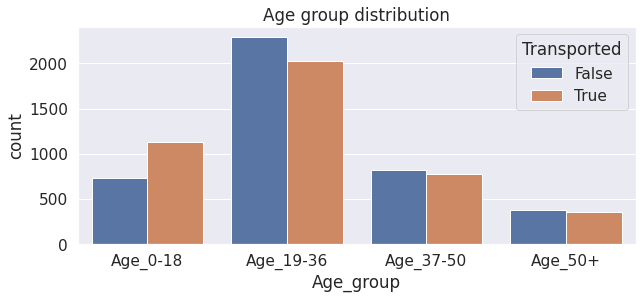

In [15]:
# Plot distribution of new features
plt.figure(figsize=(10,4))

g=sns.countplot(data=train, x='Age_group', hue='Transported', order=['Age_0-18','Age_19-36','Age_37-50','Age_50+'])
plt.title('Age group distribution')
plt.show()

Age group 0-18 seems to be transported more often that the rest.

## Create a feature with total expences for each passenger

In [16]:
expences = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train['Total_expences'] = train[expences].sum(axis=1)

How many passengers did not spend anything?

In [17]:
print(train['Total_expences'][train['Total_expences'] == 0].count(), "passengers did not spend anything.")

3653 passengers did not spend anything.


## Create a feature describing if the current passenger spend anything or not

In [18]:
train['No_spending'] = (train['Total_expences']==0).astype(int)

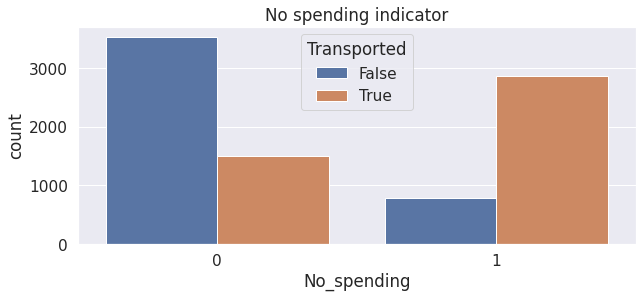

In [19]:
plt.figure(figsize=(10,4))

sns.countplot(data=train, x='No_spending', hue='Transported')
plt.title('No spending indicator')
plt.show()

Passengers that did not spend anything seems to be transported more often.

# Studying categorical data

## `PassengerId`

Extract passenger group and group size from PassengerId.

In [20]:
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
train['Group_size'] = train['PassengerId'].apply(lambda x: x.split('_')[1]).astype(int)

In [21]:
print(train['Group'].describe())

print('\nHow many unique Groups: ', train['Group'].nunique())

count    8693.000000
mean     4633.389624
std      2671.028856
min         1.000000
25%      2319.000000
50%      4630.000000
75%      6883.000000
max      9280.000000
Name: Group, dtype: float64

How many unique Groups:  6217


The `Group` feature doesn't seem to be usefull, so it will be droped later.

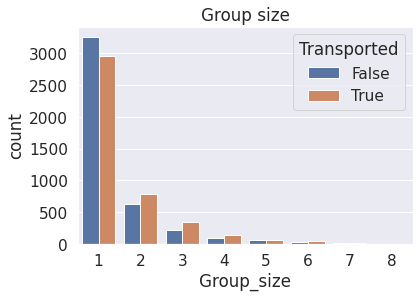

In [22]:
sns.countplot(data=train, x='Group_size', hue='Transported')
plt.title('Group size')
plt.show()

Most passengers are travelling alone. We will create a feature `Solo` indicating if the passenger is travelling alone.

## Feature `Solo` indicates if the passenger is travelling alone

In [23]:
train['Solo'] = (train['Group_size'] == 1).astype(int)

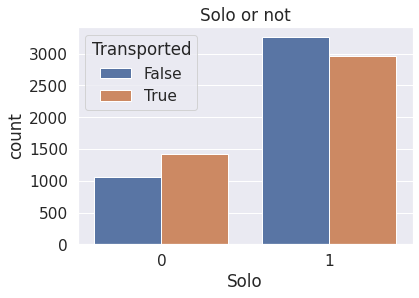

In [24]:
sns.countplot(data=train, x='Solo', hue='Transported')
plt.title('Solo or not')
plt.show()

## `Cabin`

Fill _Nan_ in `Cabin` for now, in order to apply feature engineering techniques. We will fill _NaNs_ with outliers.

In [25]:
# Replace NaN's with outliers for now (so we can split feature)
train['Cabin'].fillna('Z/9999/Z', inplace=True)

In [26]:
train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_num'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

In [27]:
# Put Nan's back in (we will fill these later)
train.loc[train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train.loc[train['Cabin_num']==9999, 'Cabin_num']=np.nan
train.loc[train['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
train.drop('Cabin', axis=1, inplace=True)

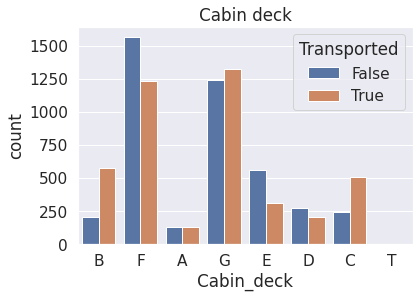

In [28]:
sns.countplot(data=train, x='Cabin_deck', hue='Transported')
plt.title('Cabin deck')
plt.show()

In [29]:
train['Cabin_deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

`Cabin_deck = 'T'` must be an outliers. It will be replaced with `nan`.

In [30]:
train.loc[train['Cabin_deck']=='T', 'Cabin_deck']=np.nan

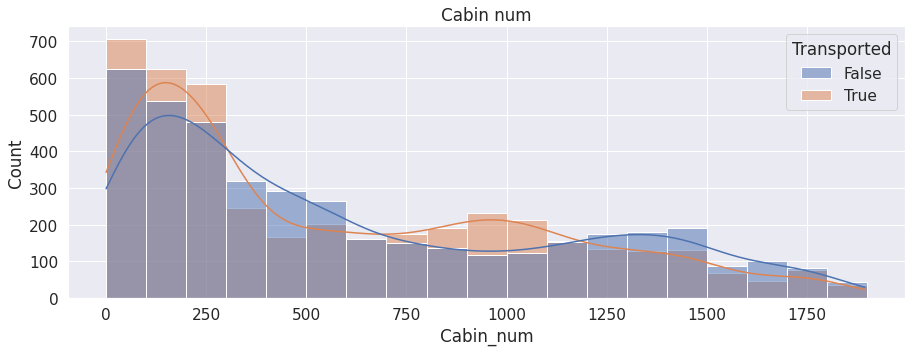

In [31]:
plt.figure(figsize=(15, 5))
sns.histplot(data=train, x='Cabin_num', hue='Transported', kde=True, binwidth=100)
plt.title('Cabin num')
plt.show()

Create `Cabin_num_group` feature

In [32]:
train['Cabin_num_group_1'] = (train['Cabin_num'] <= 300).astype(int)
train['Cabin_num_group_2'] = ((train['Cabin_num'] > 300) & (train['Cabin_num'] <= 700)).astype(int)
train['Cabin_num_group_3'] = ((train['Cabin_num'] > 700) & (train['Cabin_num'] <= 1200)).astype(int)
# train['Cabin_num_group_4'] = (train['Cabin_num'] > 1200).astype(int)  # Remove because of DUMMY TRAP

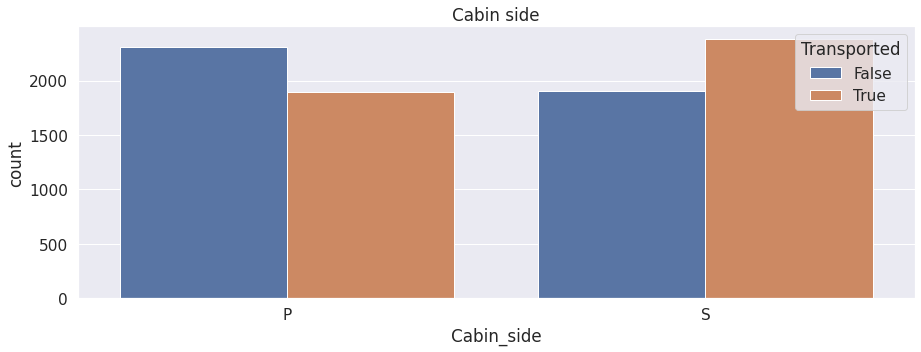

In [33]:
plt.figure(figsize=(15, 5))
sns.countplot(data=train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
plt.show()

## `Name`

Fill `nans` with outlier in order to execute feature engineering.

In [34]:
train['Name'].fillna('NoName NoName', inplace=True)

In [35]:
train['First Name'] = train['Name'].apply(lambda x: x.split()[0])
train['Family Name'] = train['Name'].apply(lambda x: x.split()[1])

Create feature `Family` indicating if the passenger is travelling with his family.

In [36]:
train['Family'] = np.nan

In [37]:
families = pd.DataFrame(train['Family Name'].value_counts())
families = families[families['Family Name']>1].index.values
families

array(['NoName', 'Casonston', 'Oneiles', ..., 'Phillis', 'Unrent',
       'Appie'], dtype=object)

In [38]:
train.loc[train['Family Name'].isin(families), 'Family'] = 1
train.loc[~train['Family Name'].isin(families), 'Family'] = 0

Replace `Family = 0` if `Name = NoName NoName`

In [39]:
noname = train[train['Family Name'] == 'NoName'].index.values
train.loc[noname, 'Family'] = 0

Drop `Name` column

In [40]:
train.drop(['Name'],axis=1,inplace=True)

In [41]:
train['Family'].value_counts()

1.0    8111
0.0     582
Name: Family, dtype: int64

## Some usefull plots

In [42]:
def plot_pie_chart(dataframe,col):
    _, ax = plt.subplots(figsize=[18,6])
    dataframe.groupby([col]).size().plot(kind='pie',autopct='%.2f%%',ax=ax, title='',label=col)     

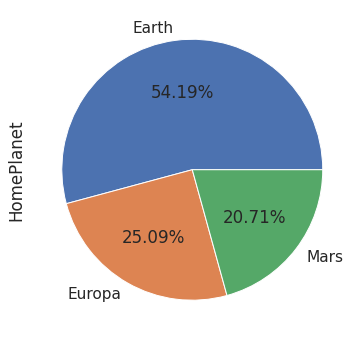

In [43]:
plot_pie_chart(train,col="HomePlanet")

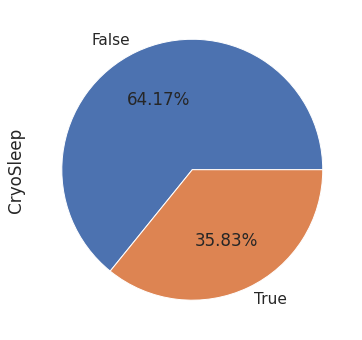

In [44]:
plot_pie_chart(train,col="CryoSleep")

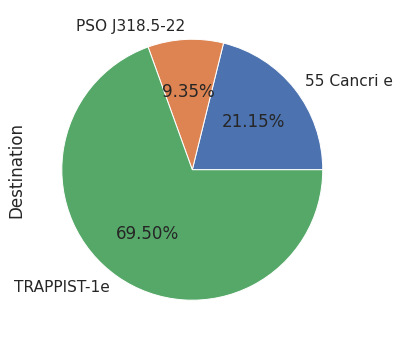

In [45]:
plot_pie_chart(train,col="Destination")

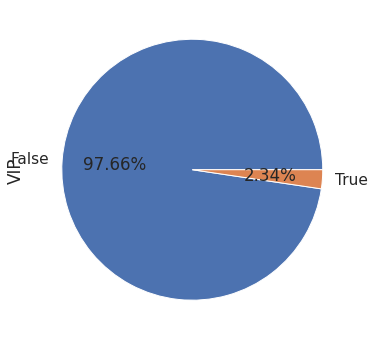

In [46]:
plot_pie_chart(train,col="VIP")

`VIP` doesn't seem to be useful feature, so it will be droped (maybe).

## Looking at target value

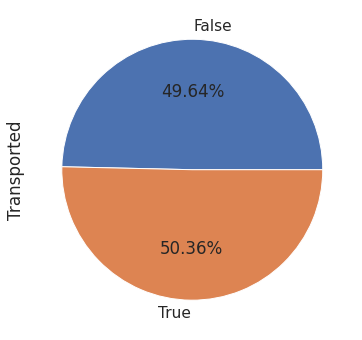

In [47]:
plot_pie_chart(train,col="Transported")

The __target__ variable is very balanced.

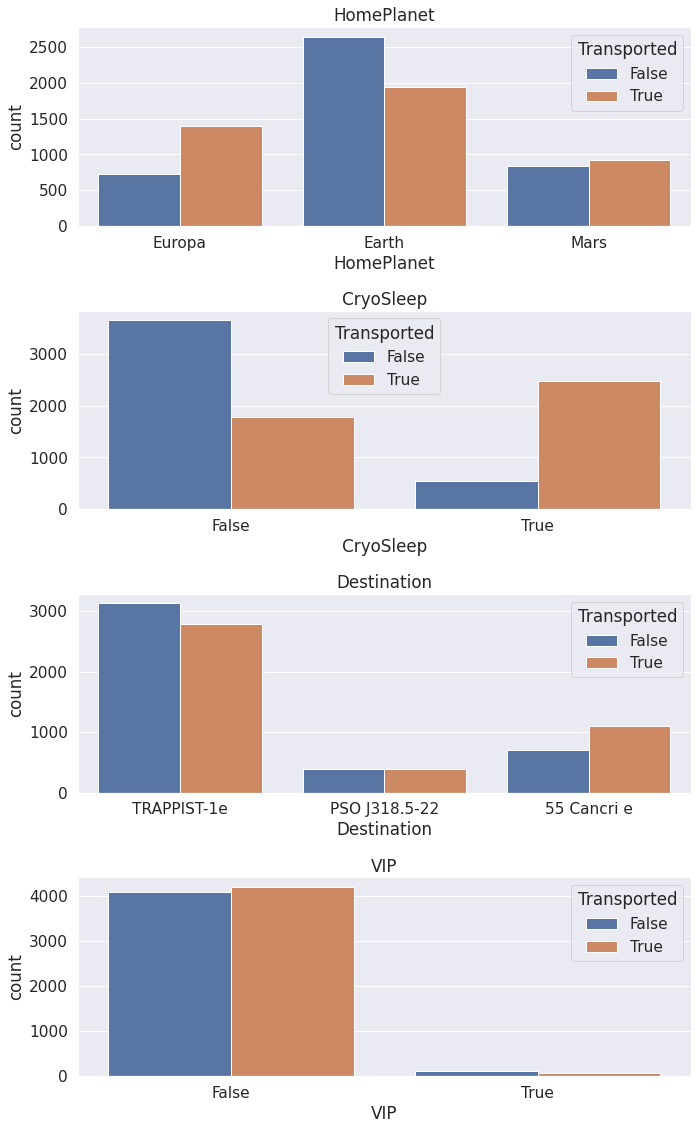

In [48]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

# Imputing the missing data 

In [49]:
# Looking at NaN % within the train data
nan = pd.DataFrame(train.isna().sum(), columns = ['NaN_sum'])
nan['Percentage(%)'] = (nan['NaN_sum']/len(train))*100
# nan['Type'] = nan.index.dtype()
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])

types = []
for i in nan.index: 
    types.append(train[i].dtype)

nan['Type'] = types

nan

,NaN_sum,Percentage(%),Type
Age,179,2.059128,float64
Age_group,179,2.059128,object
RoomService,181,2.082135,float64
Destination,182,2.093639,object
FoodCourt,183,2.105142,float64
Spa,183,2.105142,float64
VRDeck,188,2.162660,float64
Cabin_num,199,2.289198,float64
Cabin_side,199,2.289198,object
HomePlanet,201,2.312205,object


## Filling missing `CryoSleep`

If someone is in `CryoSleep`, they wouldn't spend anything...

In [50]:
train['CryoSleep'].fillna(train['No_spending'], inplace=True)

In [51]:
print('CryoSleep missing values: ', train['CryoSleep'].isna().sum())

CryoSleep missing values:  0


Transfrom `CryoSleep` to integer.

In [52]:
train['CryoSleep'] = train['CryoSleep'].astype(int)

## Filling missing `HomePlanet`

People from the same `Family`, are (probably) coming from the same `HomePlanet`.

In [53]:
train['Previous Family Name'] = train.sort_values(by=['Family Name']).groupby(['Family Name'])['Family Name'].shift(1)
train['Previous HomePlanet'] = train.sort_values(by=['Family Name']).groupby(['Family Name'])['HomePlanet'].shift(1)

In [54]:
train['HomePlanet'].fillna(train['Previous HomePlanet'], inplace=True)

In [55]:
train.sort_values(by=['Family Name'])['HomePlanet'].fillna(train.sort_values(by=['Family Name'])['Previous HomePlanet'], inplace=True)

In [56]:
train['HomePlanet'].value_counts()

Earth     4686
Europa    2163
Mars      1795
Name: HomePlanet, dtype: int64

In [57]:
print('HomePlanet missing values: ', train['HomePlanet'].isna().sum())

HomePlanet missing values:  49


Will use table above to fill remaining missing values of `HomePlanet`.

In [58]:
train.groupby(['Cabin_deck','HomePlanet']).size().unstack()

HomePlanet,Earth,Europa,Mars
Cabin_deck,,,
A,NaN,254.0,NaN
B,NaN,778.0,NaN
C,NaN,742.0,NaN
D,1.0,189.0,285.0
E,402.0,132.0,337.0
F,1643.0,2.0,1136.0
G,2541.0,NaN,NaN


In [59]:
train.loc[(train['Cabin_deck']=='A') & (train['HomePlanet'].isna()), 'HomePlanet'] = 'Europa'
train.loc[(train['Cabin_deck']=='B') & (train['HomePlanet'].isna()), 'HomePlanet'] = 'Europa'
train.loc[(train['Cabin_deck']=='C') & (train['HomePlanet'].isna()), 'HomePlanet'] = 'Europa'
train.loc[(train['Cabin_deck']=='D') & (train['HomePlanet'].isna()), 'HomePlanet'] = 'Mars'
train.loc[(train['Cabin_deck']=='E') & (train['HomePlanet'].isna()), 'HomePlanet'] = 'Earth'
train.loc[(train['Cabin_deck']=='F') & (train['HomePlanet'].isna()), 'HomePlanet'] = 'Earth'
train.loc[(train['Cabin_deck']=='G') & (train['HomePlanet'].isna()), 'HomePlanet'] = 'Earth'

In [60]:
print('HomePlanet missing values: ', train['HomePlanet'].isna().sum())

HomePlanet missing values:  2


Fill remaining `HomePlanet` with mode (Earth)

In [61]:
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)

In [62]:
print('HomePlanet missing values: ', train['HomePlanet'].isna().sum())

HomePlanet missing values:  0


## Filling missing `Age`

We can see that the median `Age` is different is cases below:

In [63]:
print(train[train['VIP']==0]['Age'].median())
print(train[train['VIP']==1]['Age'].median())
print(train['Age'].median())

27.0
34.0
27.0


In [64]:
train.loc[(train['VIP']==0) & (train['Age'].isna()), 'Age'] = train[train['VIP']==0]['Age'].median()
train.loc[(train['VIP']==1) & (train['Age'].isna()), 'Age'] = train[train['VIP']==1]['Age'].median()

Fill rest of missing `Age` as below.

In [65]:
train['Age'] = train['Age'].fillna(train.groupby(['HomePlanet', 'Solo', 'No_spending'])['Age'].transform('median'))

In [66]:
print('Age missing values: ', train['Age'].isna().sum())

Age missing values:  0


### Fill alsο `Age_group`

In [67]:
train.loc[train['Age']<= 18, 'Age_group'] = 'Age_0-18'
train.loc[(train['Age'] > 18) & (train['Age'] <= 36), 'Age_group'] = 'Age_19-36'
train.loc[(train['Age'] > 36) & (train['Age'] <= 50), 'Age_group'] = 'Age_37-50'
train.loc[train['Age'] > 50, 'Age_group'] = 'Age_50+'

In [68]:
print('Age_group missing values: ', train['Age_group'].isna().sum())

Age_group missing values:  0


## Filling missing `Destination`

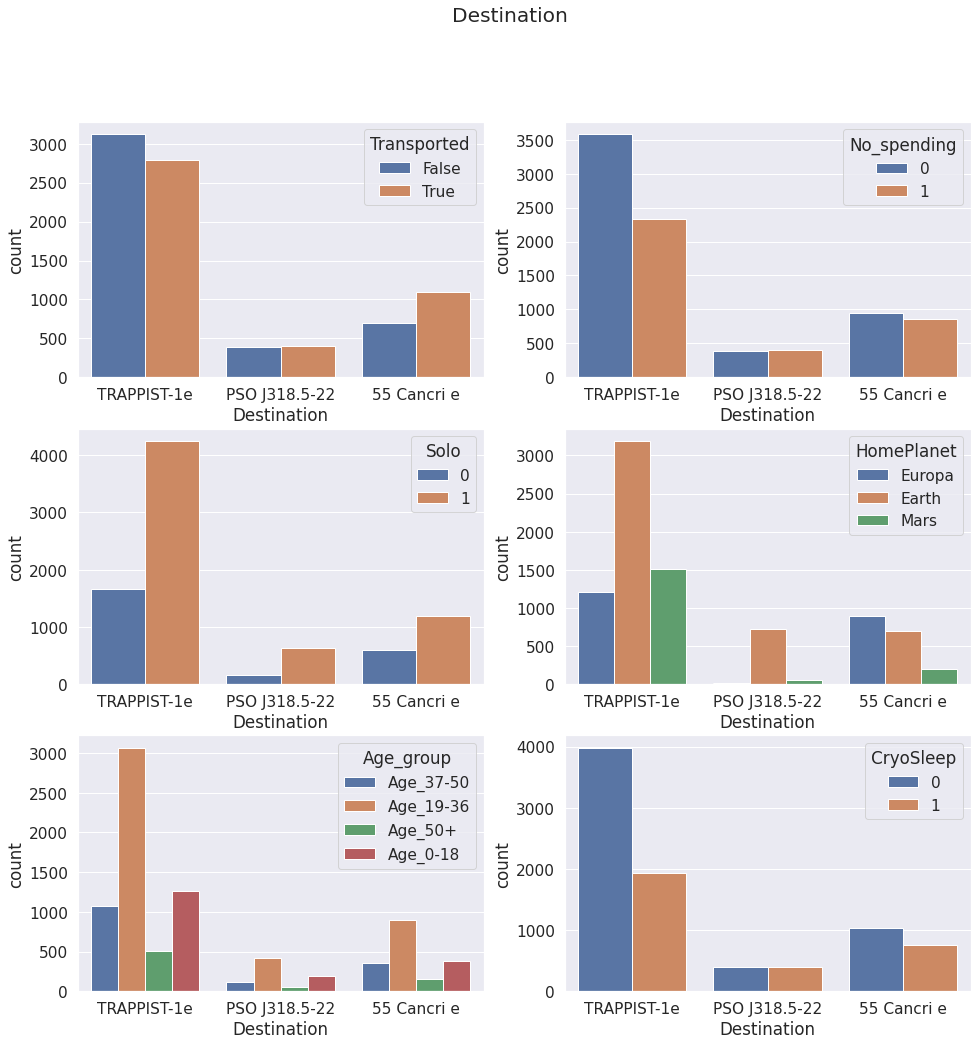

In [69]:
fig, axes = plt.subplots(3, 2, figsize=(16,16))
fig.suptitle('Destination')
sns.countplot(ax=axes[0][0], data=train, x='Destination', hue='Transported')
sns.countplot(ax=axes[0][1], data=train, x='Destination', hue='No_spending')
sns.countplot(ax=axes[1][0], data=train, x='Destination', hue='Solo')
sns.countplot(ax=axes[1][1], data=train, x='Destination', hue='HomePlanet')
sns.countplot(ax=axes[2][0], data=train, x='Destination', hue='Age_group')
sns.countplot(ax=axes[2][1], data=train, x='Destination', hue='CryoSleep')
plt.show()

In [70]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [71]:
for i in train[train['Destination'].isnull()].index:
    if((train.iloc[i]['HomePlanet']=='Earth')): 
        train.loc[i, 'Destination'] = 'TRAPPIST-1e'

for i in train[train['Destination'].isnull()].index:
    if((train.iloc[i]['HomePlanet']=='Mars')): 
        train.loc[i, 'Destination'] = 'TRAPPIST-1e'
        
for i in train[train['Destination'].isnull()].index:
    if((train.iloc[i]['HomePlanet']=='Europa')): 
        train.loc[i, 'Destination'] = '55 Cancri e'

In [72]:
print('Destination missing values: ', train['Destination'].isna().sum())

Destination missing values:  0


## Filling `Cabin_side`

In [73]:
train.groupby(['Cabin_side','HomePlanet']).size().unstack()

HomePlanet,Earth,Europa,Mars
Cabin_side,,,
P,2329,970,907
S,2295,1139,854


Fill `NaN` using the logic from table above.

In [74]:
train.loc[(train['HomePlanet']=='Earth') & (train['Cabin_side'].isna()), 'Cabin_side'] = 'P'
train.loc[(train['HomePlanet']=='Europa') & (train['Cabin_side'].isna()), 'Cabin_side'] = 'S'
train.loc[(train['HomePlanet']=='Mars') & (train['Cabin_side'].isna()), 'Cabin_side'] = 'P'

In [75]:
print('Cabin_side missing values: ', train['Cabin_side'].isna().sum())

Cabin_side missing values:  0


## Filling `Cabin_deck` 

In [76]:
train['Cabin_deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
Name: Cabin_deck, dtype: int64

In [77]:
train.groupby(['Cabin_deck','No_spending']).size().unstack()

No_spending,0,1
Cabin_deck,,
A,168,88
B,308,471
C,424,323
D,369,109
E,645,231
F,2140,654
G,879,1680


In [78]:
for i in train[train['Cabin_deck'].isnull()].index:
    if((train.iloc[i]['No_spending']==1)): 
        train.loc[i, 'Cabin_deck'] = 'G'
    else: 
        train.loc[i, 'Cabin_deck'] = 'F'

In [79]:
print('Cabin_deck missing values: ', train['Cabin_deck'].isna().sum())

Cabin_deck missing values:  0


## Final check of missing values

In [80]:
train.isnull().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Destination                0
Age                        0
VIP                      203
RoomService              181
FoodCourt                183
ShoppingMall             208
Spa                      183
VRDeck                   188
Transported                0
Age_group                  0
Total_expences             0
Expenditure                0
No_spending                0
Group                      0
Group_size                 0
Solo                       0
Cabin_deck                 0
Cabin_num                199
Cabin_side                 0
Cabin_num_group_1          0
Cabin_num_group_2          0
Cabin_num_group_3          0
First Name                 0
Family Name                0
Family                     0
Previous Family Name    2218
Previous HomePlanet     2362
dtype: int64

# Drop unusefull columns

In [81]:
train.drop(['First Name','Family Name', 'VIP','Cabin_num','Group', 'Previous Family Name', 'Previous HomePlanet'],axis=1,inplace=True)

# Filling remaining missing values of numerical features

In [82]:
train.loc[train['No_spending']==1, 'RoomService'] = 0
train.loc[train['No_spending']==1, 'FoodCourt'] = 0
train.loc[train['No_spending']==1, 'Spa'] = 0
train.loc[train['No_spending']==1, 'ShoppingMall'] = 0

In [83]:
from sklearn.impute import SimpleImputer

# filling the null values with median 

imputer_cols = ["FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median" )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])

# Set index `PassengerId` 

In [84]:
train = train.set_index('PassengerId')

In [85]:
pd.set_option('display.max_columns', None)
train.head(2)

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group,Total_expences,Expenditure,No_spending,Group_size,Solo,Cabin_deck,Cabin_side,Cabin_num_group_1,Cabin_num_group_2,Cabin_num_group_3,Family
PassengerId,,,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,Age_37-50,0.0,0.0,1,1,1,B,P,1,0,0,0.0
0002_01,Earth,0,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,Age_19-36,736.0,736.0,0,1,1,F,S,1,0,0,1.0


# Encode boolean variable (True/False to 1/0)

In [86]:
# label encoding 
from sklearn.preprocessing import LabelEncoder

label_cols = ["HomePlanet", "Destination", "Age_group", "Cabin_deck", "Group_size", "Cabin_side"]
def label_encoder(df, columns):
    for col in columns:
        train[col] = train[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
    return df

train = label_encoder(train, label_cols)
train.shape

(8693, 22)

In [87]:
for col in label_cols:
    dummies = pd.get_dummies(train[col], prefix=col, drop_first=True)
    train = pd.concat([train, dummies], axis=1)
    train.drop([col], axis=1, inplace=True)

print(train.shape)

(8693, 37)


In [88]:
train['Transported'] = train['Transported'].astype(int)

In [89]:
pd.set_option('display.max_columns', None)
train.head(3)

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_expences,Expenditure,No_spending,Solo,Cabin_num_group_1,Cabin_num_group_2,Cabin_num_group_3,Family,HomePlanet_1,HomePlanet_2,Destination_1,Destination_2,Age_group_1,Age_group_2,Age_group_3,Cabin_deck_1,Cabin_deck_2,Cabin_deck_3,Cabin_deck_4,Cabin_deck_5,Cabin_deck_6,Group_size_1,Group_size_2,Group_size_3,Group_size_4,Group_size_5,Group_size_6,Group_size_7,Cabin_side_1
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001_01,0,39.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,1,1,0,0,0.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
0002_01,0,24.0,109.0,9.0,25.0,549.0,44.0,1,736.0,736.0,0,1,1,0,0,1.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
0003_01,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,10383.0,0,1,1,0,0,1.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [90]:
train.shape

(8693, 37)

# SAVE FINAL .CSV 

In [91]:
train.to_csv('dataset.csv', index=True)

In [92]:
dataset = pd.read_csv('dataset.csv')

In [93]:
dataset

,PassengerId,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_expences,Expenditure,No_spending,Solo,Cabin_num_group_1,Cabin_num_group_2,Cabin_num_group_3,Family,HomePlanet_1,HomePlanet_2,Destination_1,Destination_2,Age_group_1,Age_group_2,Age_group_3,Cabin_deck_1,Cabin_deck_2,Cabin_deck_3,Cabin_deck_4,Cabin_deck_5,Cabin_deck_6,Group_size_1,Group_size_2,Group_size_3,Group_size_4,Group_size_5,Group_size_6,Group_size_7,Cabin_side_1
0,0001_01,0,39.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,1,1,0,0,0.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0002_01,0,24.0,109.0,9.0,25.0,549.0,44.0,1,736.0,736.0,0,1,1,0,0,1.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0003_01,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,10383.0,0,1,1,0,0,1.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0003_02,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0,5176.0,0,0,1,0,0,1.0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0004_01,0,16.0,303.0,70.0,151.0,565.0,2.0,1,1091.0,1091.0,0,1,1,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,0.0,6819.0,0.0,1643.0,74.0,0,8536.0,8536.0,0,1,1,0,0,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8689,9278_01,1,18.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,1,0,0,0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8690,9279_01,0,26.0,0.0,0.0,1872.0,1.0,0.0,1,1873.0,1873.0,0,1,0,0,0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8691,9280_01,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0,4637.0,4637.0,0,1,0,1,0,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


# Run a quick Logistic Regression

In [94]:
X = train.drop(['Transported'],axis=1)
y = train['Transported']

In [95]:
from sklearn.model_selection import train_test_split

# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,
                                                      train_size=0.8,test_size=0.2,random_state=0)

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.7906843013225991